In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Objection Creation(객체 생성) #

Pandas는 값을 가지고 있는 리스트를 통해 Series를 만들고, 정수로 만들어진 인덱스를 기본값으로 불러올 것입니다.

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터프레임을 만듭니다.

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,0.346349,-1.672185,0.015377,-0.317240
2013-01-02,0.042473,-0.502410,0.095307,-1.186841
2013-01-03,-1.307960,0.467970,-0.585723,0.603077
2013-01-04,-0.987751,0.533278,0.318436,-0.593741
2013-01-05,-0.403097,-2.262742,-0.036899,-0.760669
2013-01-06,0.314674,-0.239356,0.860738,-1.501124


In [8]:
df2 = pd.DataFrame({'A' : 1.,
                   'B' : pd.Timestamp('20130102'),
                   'C' : pd.Series(1,index=list(range(4)), dtype='float32'),
                   'D' : np.array([3] * 4, dtype='int32'),
                   'E' : pd.Categorical(['test','train','test','train']),
                   'F' : 'foo'})

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 2. Viewing Data(데이터 확인하기)

데이터프레임의 가장 윗줄과 마지막 줄을 확인하고 싶을 때에 사용하는 방법은 다음과 같습니다.

In [11]:
df.tail(3) #끝에서 마지막 3줄을 불러옴

,A,B,C,D
2013-01-04,-0.987751,0.533278,0.318436,-0.593741
2013-01-05,-0.403097,-2.262742,-0.036899,-0.760669
2013-01-06,0.314674,-0.239356,0.860738,-1.501124


In [12]:
df.tail() #끝에서 마지막 5줄을 불러옴 default값이 5이다.

,A,B,C,D
2013-01-02,0.042473,-0.502410,0.095307,-1.186841
2013-01-03,-1.307960,0.467970,-0.585723,0.603077
2013-01-04,-0.987751,0.533278,0.318436,-0.593741
2013-01-05,-0.403097,-2.262742,-0.036899,-0.760669
2013-01-06,0.314674,-0.239356,0.860738,-1.501124


In [13]:
df.head() #위에서 5줄을 불러옴. default값이 5이다.

,A,B,C,D
2013-01-01,0.346349,-1.672185,0.015377,-0.317240
2013-01-02,0.042473,-0.502410,0.095307,-1.186841
2013-01-03,-1.307960,0.467970,-0.585723,0.603077
2013-01-04,-0.987751,0.533278,0.318436,-0.593741
2013-01-05,-0.403097,-2.262742,-0.036899,-0.760669


In [14]:
#인덱스(index), 열(columns) 그리고 numpy 데이터에 대한 세부 정보를 봅니다.
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 0.34634877, -1.67218457,  0.01537722, -0.31724025],
       [ 0.04247308, -0.50241033,  0.09530744, -1.18684104],
       [-1.30796026,  0.46796958, -0.58572272,  0.60307658],
       [-0.98775063,  0.53327816,  0.31843587, -0.59374081],
       [-0.4030973 , -2.26274233, -0.03689918, -0.7606694 ],
       [ 0.31467358, -0.23935647,  0.86073756, -1.50112396]])

In [17]:
#describe()는 데이터의 대략적인 정보 요약을 보여줍니다.
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.332552,-0.612574,0.111206,-0.626090
std,0.693705,1.138227,0.473671,0.735598
min,-1.307960,-2.262742,-0.585723,-1.501124
25%,-0.841587,-1.379741,-0.023830,-1.080298
50%,-0.180312,-0.370883,0.055342,-0.677205
75%,0.246623,0.291138,0.262654,-0.386365
max,0.346349,0.533278,0.860738,0.603077


In [18]:
#데이터를 전치합니다.
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.346349,0.042473,-1.307960,-0.987751,-0.403097,0.314674
B,-1.672185,-0.502410,0.467970,0.533278,-2.262742,-0.239356
C,0.015377,0.095307,-0.585723,0.318436,-0.036899,0.860738
D,-0.317240,-1.186841,0.603077,-0.593741,-0.760669,-1.501124


In [19]:
df

,A,B,C,D
2013-01-01,0.346349,-1.672185,0.015377,-0.317240
2013-01-02,0.042473,-0.502410,0.095307,-1.186841
2013-01-03,-1.307960,0.467970,-0.585723,0.603077
2013-01-04,-0.987751,0.533278,0.318436,-0.593741
2013-01-05,-0.403097,-2.262742,-0.036899,-0.760669
2013-01-06,0.314674,-0.239356,0.860738,-1.501124


In [20]:
#축 별로 정렬합니다.
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.317240,0.015377,-1.672185,0.346349
2013-01-02,-1.186841,0.095307,-0.502410,0.042473
2013-01-03,0.603077,-0.585723,0.467970,-1.307960
2013-01-04,-0.593741,0.318436,0.533278,-0.987751
2013-01-05,-0.760669,-0.036899,-2.262742,-0.403097
2013-01-06,-1.501124,0.860738,-0.239356,0.314674


In [21]:
#값 별로 정렬합니다.
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-0.403097,-2.262742,-0.036899,-0.760669
2013-01-01,0.346349,-1.672185,0.015377,-0.317240
2013-01-02,0.042473,-0.502410,0.095307,-1.186841
2013-01-06,0.314674,-0.239356,0.860738,-1.501124
2013-01-03,-1.307960,0.467970,-0.585723,0.603077
2013-01-04,-0.987751,0.533278,0.318436,-0.593741


# 3. Selection(선택)

.at, .iat, .loc 및 .iloc를 추천합니다.

## Getting(데이터 얻기)


In [22]:
#df.A와 동일한 Series를 생성하는 단일 열을 선택합니다.
df['A']

2013-01-01    0.346349
2013-01-02    0.042473
2013-01-03   -1.307960
2013-01-04   -0.987751
2013-01-05   -0.403097
2013-01-06    0.314674
Freq: D, Name: A, dtype: float64

In [23]:
#행을 분할하는 []를 통해 선택합니다.
df[0:3]

,A,B,C,D
2013-01-01,0.346349,-1.672185,0.015377,-0.317240
2013-01-02,0.042473,-0.502410,0.095307,-1.186841
2013-01-03,-1.307960,0.467970,-0.585723,0.603077


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.042473,-0.502410,0.095307,-1.186841
2013-01-03,-1.307960,0.467970,-0.585723,0.603077
2013-01-04,-0.987751,0.533278,0.318436,-0.593741


## Selection by Label(Label을 통한 선택)

In [25]:
#라벨을 사용하여 횡단면을 얻습니다.
df.loc[dates[0]]

A    0.346349
B   -1.672185
C    0.015377
D   -0.317240
Name: 2013-01-01 00:00:00, dtype: float64

In [26]:
#라벨을 사용하여 여러 축(의 데이터)을 얻습니다
df.loc[:,['A','B']]

,A,B
2013-01-01,0.346349,-1.672185
2013-01-02,0.042473,-0.502410
2013-01-03,-1.307960,0.467970
2013-01-04,-0.987751,0.533278
2013-01-05,-0.403097,-2.262742
2013-01-06,0.314674,-0.239356


In [27]:
#양쪽 종단점을 포함한 라벨 슬라이싱을 봅니다.
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.042473,-0.502410
2013-01-03,-1.307960,0.467970
2013-01-04,-0.987751,0.533278


In [28]:
#반환되는 객체의 차원을 줄입니다.
df.loc['20130102',['A','B']]

A    0.042473
B   -0.502410
Name: 2013-01-02 00:00:00, dtype: float64

In [29]:
#스칼라 값을 얻습니다.
df.loc[dates[0],'A']

0.3463487747969564

In [30]:
#스칼라 값을 더 빠르게 구하는 방법입니다(앞선 메소드와 동일합니다.)
df.at[dates[0],'A']

0.3463487747969564

## Selection by Position(위치로 선택하기)

In [31]:
#넘겨받은 정수의 위치를 기준으로 선택합니다.
df.iloc[3]

A   -0.987751
B    0.533278
C    0.318436
D   -0.593741
Name: 2013-01-04 00:00:00, dtype: float64

In [32]:
#정수로 표기된 슬라이스들을 통해, numpy/python과 유사하게 동작합니다.
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.987751,0.533278
2013-01-05,-0.403097,-2.262742


In [33]:
#정수로 표기된 위치값의 리스트롤 통해, numpy/python의 스타일과 유사해집니다.
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.042473,0.095307
2013-01-03,-1.307960,-0.585723
2013-01-05,-0.403097,-0.036899


In [34]:
#명시적으로 행을 나누고자 하는 경우입니다.
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.042473,-0.50241,0.095307,-1.186841
2013-01-03,-1.307960,0.46797,-0.585723,0.603077


In [35]:
#명시적으로 열을 나누고자 하는 경우입니다.
df.iloc[:,1:3]

,B,C
2013-01-01,-1.672185,0.015377
2013-01-02,-0.502410,0.095307
2013-01-03,0.467970,-0.585723
2013-01-04,0.533278,0.318436
2013-01-05,-2.262742,-0.036899
2013-01-06,-0.239356,0.860738


In [36]:
#명시적으로 (특정한)값을 얻고자 하는 경우입니다.
df.iloc[1,1]

-0.5024103304805683

In [37]:
#스칼라 값을 빠르게 얻는 방법입니다.(위의 방식과 동일합니다.)
df.iat[1,1]

-0.5024103304805683

## Boolean Indexing

In [38]:
#데이터를 선택하기 위해 단일 열의 값을 사용합니다.
df[df.A < 0]

,A,B,C,D
2013-01-03,-1.307960,0.467970,-0.585723,0.603077
2013-01-04,-0.987751,0.533278,0.318436,-0.593741
2013-01-05,-0.403097,-2.262742,-0.036899,-0.760669


In [39]:
#Boolean 조건을 충족하는 데이터프레임에서 값을 선택합니다.
df[df > 0]

,A,B,C,D
2013-01-01,0.346349,NaN,0.015377,NaN
2013-01-02,0.042473,NaN,0.095307,NaN
2013-01-03,NaN,0.467970,NaN,0.603077
2013-01-04,NaN,0.533278,0.318436,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,0.314674,NaN,0.860738,NaN


In [40]:
#필터링을 위한 메소드 isin()을 사용합니다.
df2 = df.copy()
df2['E'] = ['one','ono','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.346349,-1.672185,0.015377,-0.317240,one
2013-01-02,0.042473,-0.502410,0.095307,-1.186841,ono
2013-01-03,-1.307960,0.467970,-0.585723,0.603077,two
2013-01-04,-0.987751,0.533278,0.318436,-0.593741,three
2013-01-05,-0.403097,-2.262742,-0.036899,-0.760669,four
2013-01-06,0.314674,-0.239356,0.860738,-1.501124,three


In [41]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.307960,0.467970,-0.585723,0.603077,two
2013-01-05,-0.403097,-2.262742,-0.036899,-0.760669,four


## Setting(설정)

In [42]:
#새 열을 설정하면 데이터가 인덱스 별로 자동 정렬됩니다.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [43]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [44]:
df['F'] = s1

In [45]:
df

,A,B,C,D,F
2013-01-01,0.346349,-1.672185,0.015377,-0.317240,NaN
2013-01-02,0.042473,-0.502410,0.095307,-1.186841,1.0
2013-01-03,-1.307960,0.467970,-0.585723,0.603077,2.0
2013-01-04,-0.987751,0.533278,0.318436,-0.593741,3.0
2013-01-05,-0.403097,-2.262742,-0.036899,-0.760669,4.0
2013-01-06,0.314674,-0.239356,0.860738,-1.501124,5.0


In [46]:
#라벨에 의해 값을 설정합니다.
df.at[dates[0],'A'] = 0

In [47]:
#위치에 의해 값을 설정합니다.
df.iat[0,1] = 0

In [48]:
#Numpy 배열에 사용한 할당에 의해 값을 설정합니다.
df.loc[:,'D'] = np.array([5] * len(df))

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.015377,5,NaN
2013-01-02,0.042473,-0.502410,0.095307,5,1.0
2013-01-03,-1.307960,0.467970,-0.585723,5,2.0
2013-01-04,-0.987751,0.533278,0.318436,5,3.0
2013-01-05,-0.403097,-2.262742,-0.036899,5,4.0
2013-01-06,0.314674,-0.239356,0.860738,5,5.0


In [50]:
#where 연산을 설정합니다.
df2 = df.copy()

In [51]:
df2[df2 > 0] = -df2

In [52]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.015377,-5,NaN
2013-01-02,-0.042473,-0.502410,-0.095307,-5,-1.0
2013-01-03,-1.307960,-0.467970,-0.585723,-5,-2.0
2013-01-04,-0.987751,-0.533278,-0.318436,-5,-3.0
2013-01-05,-0.403097,-2.262742,-0.036899,-5,-4.0
2013-01-06,-0.314674,-0.239356,-0.860738,-5,-5.0


# 4.Missing Data(결측치)
Pandas는 결측치를 표현하기 위해 주로 np.nan 값을 사용합니다.
이 방법은 기본 설정값이지만 계산에는 포함되지 않습니다.

Reindexing으로 지정된 축 상의 인덱스를 변경/추가/삭제할 수 있습니다.
Reindexing은 데이터의 복사본을 반환합니다.

In [53]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [54]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [55]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.015377,5,NaN,1.0
2013-01-02,0.042473,-0.502410,0.095307,5,1.0,1.0
2013-01-03,-1.307960,0.467970,-0.585723,5,2.0,NaN
2013-01-04,-0.987751,0.533278,0.318436,5,3.0,NaN


In [56]:
del df1['F']

In [57]:
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.015377,5,1.0
2013-01-02,0.042473,-0.502410,0.095307,5,1.0
2013-01-03,-1.307960,0.467970,-0.585723,5,NaN
2013-01-04,-0.987751,0.533278,0.318436,5,NaN


In [58]:
#결측치를 가지고 있는 행들을 지웁니다.
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.00000,0.015377,5,1.0
2013-01-02,0.042473,-0.50241,0.095307,5,1.0


In [59]:
#결측치를 채워 넣습니다.
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.015377,5,1.0
2013-01-02,0.042473,-0.502410,0.095307,5,1.0
2013-01-03,-1.307960,0.467970,-0.585723,5,5.0
2013-01-04,-0.987751,0.533278,0.318436,5,5.0


In [60]:
#nan인 값에 boolean을 통한 표식을 얻습니다.
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


# 5.Operation(연산)

## Stats(통계)
일반적으로 결측치를 제외한 후 연산됩니다.
기술통계를 수행합니다.

In [61]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.015377,5,NaN
2013-01-02,0.042473,-0.502410,0.095307,5,1.0
2013-01-03,-1.307960,0.467970,-0.585723,5,2.0
2013-01-04,-0.987751,0.533278,0.318436,5,3.0
2013-01-05,-0.403097,-2.262742,-0.036899,5,4.0
2013-01-06,0.314674,-0.239356,0.860738,5,5.0


In [62]:
df.mean()

A   -0.390277
B   -0.333877
C    0.111206
D    5.000000
F    3.000000
dtype: float64

In [63]:
#다른축에서 동일한 연산을 수행합니다.
df.mean(1)

2013-01-01    1.253844
2013-01-02    1.127074
2013-01-03    1.114857
2013-01-04    1.572793
2013-01-05    1.259452
2013-01-06    2.187211
Freq: D, dtype: float64

In [64]:
#정렬이 필요하며, 차원이 다른 객체로 연산해보겠습니다. 또한, Pandas는 지정된 차원을 따라 자동으로
#브로드 캐스팅 됩니다.
# bradcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는
# 결과의 규칙을 설명하는 것을 의미합니다.

s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [65]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [66]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.307960,-0.532030,-1.585723,4.0,1.0
2013-01-04,-3.987751,-2.466722,-2.681564,2.0,0.0
2013-01-05,-5.403097,-7.262742,-5.036899,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [67]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.015377,5,NaN
2013-01-02,0.042473,-0.502410,0.095307,5,1.0
2013-01-03,-1.307960,0.467970,-0.585723,5,2.0
2013-01-04,-0.987751,0.533278,0.318436,5,3.0
2013-01-05,-0.403097,-2.262742,-0.036899,5,4.0
2013-01-06,0.314674,-0.239356,0.860738,5,5.0


## Apply(적용)

In [68]:
#데이터에 함수를 적용합니다.
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.015377,5,NaN
2013-01-02,0.042473,-0.502410,0.110685,10,1.0
2013-01-03,-1.265487,-0.034441,-0.475038,15,3.0
2013-01-04,-2.253238,0.498837,-0.156602,20,6.0
2013-01-05,-2.656335,-1.763905,-0.193501,25,10.0
2013-01-06,-2.341662,-2.003261,0.667236,30,15.0


In [69]:
df.apply(lambda x : x.max() - x.min())

A    1.622634
B    2.796020
C    1.446460
D    0.000000
F    4.000000
dtype: float64

## Histogramming(히스토그래밍)

In [70]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [71]:
s

0    2
1    2
2    1
3    6
4    2
5    2
6    1
7    3
8    1
9    1
dtype: int32

In [72]:
s.value_counts()

2    4
1    4
6    1
3    1
dtype: int64

## String Methods(문자열 메소드)

In [73]:
#Series는 다음의 코드와 같이 문자열 처리 메소드 모음(set)을 가지고 있습니다.
#이 모음은 배열의 각 요소를 쉽게 조작할 수 있도록 만들어주는 문자열의 속성에 포함되어 있습니다.

#문자열의 패턴 일치 확인은 기본적으로 정규 표현식을 사용하며, 
#몇몇 경우에는 항상 정규 표현식을 사용함에 유의하십시오.

s = pd.Series(['A','B','C','Aaba','Baca',np.nan, 'CABA','dog','cat'])

In [74]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 6.Merge (병합)

## Concat(연결)

결합(join) / 병합(merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한
다양한 형태의 논리를 포함한 Series, DataFrame, Panel 객체를 손쉽게
결합할 수 있도록 하는 다양한 기능을 pandas에서 제공합니다.

In [75]:
#concat()으로 pandas 객체를 연결합니다.
df = pd.DataFrame(np.random.randn(10,4))

In [76]:
df

,0,1,2,3
0,-0.894997,-0.383103,-0.556926,-0.552837
1,-0.802444,-0.820880,-1.095656,0.539412
2,1.355942,0.355863,-0.638691,0.051141
3,0.400796,-0.562825,-1.190853,0.456936
4,-1.130847,0.195312,1.182437,-1.413174
5,1.767413,1.130745,1.529490,-0.548746
6,-0.338628,-1.926332,0.825639,-0.138688
7,-1.310803,1.378944,-1.596597,2.678980
8,-0.260690,1.201391,1.845739,-0.646458
9,-0.025905,1.295829,1.112414,-0.426246


In [77]:
#break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [78]:
pd.concat(pieces)

,0,1,2,3
0,-0.894997,-0.383103,-0.556926,-0.552837
1,-0.802444,-0.820880,-1.095656,0.539412
2,1.355942,0.355863,-0.638691,0.051141
3,0.400796,-0.562825,-1.190853,0.456936
4,-1.130847,0.195312,1.182437,-1.413174
5,1.767413,1.130745,1.529490,-0.548746
6,-0.338628,-1.926332,0.825639,-0.138688
7,-1.310803,1.378944,-1.596597,2.678980
8,-0.260690,1.201391,1.845739,-0.646458
9,-0.025905,1.295829,1.112414,-0.426246


In [79]:
pieces

[          0         1         2         3
 0 -0.894997 -0.383103 -0.556926 -0.552837
 1 -0.802444 -0.820880 -1.095656  0.539412
 2  1.355942  0.355863 -0.638691  0.051141,
           0         1         2         3
 3  0.400796 -0.562825 -1.190853  0.456936
 4 -1.130847  0.195312  1.182437 -1.413174
 5  1.767413  1.130745  1.529490 -0.548746
 6 -0.338628 -1.926332  0.825639 -0.138688,
           0         1         2         3
 7 -1.310803  1.378944 -1.596597  2.678980
 8 -0.260690  1.201391  1.845739 -0.646458
 9 -0.025905  1.295829  1.112414 -0.426246]

## Join(결합)

SQL 방식으로 병합합니다.

In [80]:
left = pd.DataFrame({'key': ['foo','foo'], 'lval': [1,2]})

In [81]:
right = pd.DataFrame({'key': ['foo','foo'], 'rval' : [4, 5]})

In [82]:
left

,key,lval
0,foo,1
1,foo,2


In [83]:
right

,key,rval
0,foo,4
1,foo,5


In [84]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [85]:
#다른 예시
left = pd.DataFrame({'key' : ['foo','bar'], 'lval' : [1, 2]})

In [86]:
right = pd.DataFrame({'key' : ['foo', 'bar'], 'rval' : [4, 5]})

In [87]:
left

,key,lval
0,foo,1
1,bar,2


In [88]:
right

,key,rval
0,foo,4
1,bar,5


In [89]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Append(추가)

데이터프레임에 행을 추가합니다.

In [90]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])

In [91]:
df

,A,B,C,D
0,0.772207,0.891316,-0.438846,-0.064181
1,-0.905813,1.432526,0.669640,-1.059211
2,0.742012,-0.820838,-0.592325,-1.144914
3,0.744959,-1.673998,0.846000,0.231696
4,0.275441,0.982868,0.495511,2.289744
5,-1.532210,0.234798,-0.892098,-1.584254
6,0.550955,1.173677,-0.016575,-0.596258
7,-0.211247,0.575802,-1.340779,-0.073118


In [92]:
s = df.iloc[3]

In [93]:
s

A    0.744959
B   -1.673998
C    0.846000
D    0.231696
Name: 3, dtype: float64

In [94]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.772207,0.891316,-0.438846,-0.064181
1,-0.905813,1.432526,0.669640,-1.059211
2,0.742012,-0.820838,-0.592325,-1.144914
3,0.744959,-1.673998,0.846000,0.231696
4,0.275441,0.982868,0.495511,2.289744
5,-1.532210,0.234798,-0.892098,-1.584254
6,0.550955,1.173677,-0.016575,-0.596258
7,-0.211247,0.575802,-1.340779,-0.073118
8,0.744959,-1.673998,0.846000,0.231696


# 7. Grouping (그룹화)

그룹화는 다음 단계 중 하나 이상을 포함하는 과정을 가리킵니다.
 * 몇몇 기준에 따라 여러 그룹으로 데이터를 분할(splitting)
 * 각 그룹에 독립적으로 함수를 적용(applying)
 * 결과물들을 하나의 데이터 구조로 결합(combining)
 

In [95]:
df = pd.DataFrame(
{
    'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C' : np.random.randn(8),
    'D' : np.random.randn(8)
})

In [96]:
df

,A,B,C,D
0,foo,one,-0.100590,0.092239
1,bar,one,1.209005,0.934319
2,foo,two,0.855166,-0.031598
3,bar,three,1.119425,-0.260588
4,foo,two,0.598343,0.072397
5,bar,two,-0.304603,0.711043
6,foo,one,0.302187,0.256023
7,foo,three,0.426365,-1.077265


In [97]:
#생성된 데이터프레임을 그룹화한 후 각 그룹에 sum() 함수를 적용합니다.
df.groupby('A').sum()

,C,D
A,,
bar,2.023827,1.384774
foo,2.081472,-0.688204


In [99]:
#여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성됩니다. 여기에도 sum 함수를 적용할 수 있습니다.
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.209005  0.934319
    three  1.119425 -0.260588
    two   -0.304603  0.711043
foo one    0.201598  0.348262
    three  0.426365 -1.077265
    two    1.453509  0.040799

# 8. Reshaping(변형)

## Stack(스택)

In [115]:
tuples = list(zip(*[['bar','bar','baz','baz','foo','foo','qux','qux'],
                   ['one','two','one','two','one', 'two','one','two']]))

In [118]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [119]:
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])

In [120]:
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [121]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A','B'])

In [122]:
df

A         B
first second                    
bar   one    -1.009571  0.485752
      two    -0.136430 -2.127732
baz   one    -0.623444 -1.742493
      two     0.659275 -0.534619
foo   one     0.009762  0.753157
      two    -0.595340  0.634291
qux   one    -0.559582 -1.384762
      two     0.545659  1.106447

In [123]:
df2 = df[:4]

In [124]:
df2

A         B
first second                    
bar   one    -1.009571  0.485752
      two    -0.136430 -2.127732
baz   one    -0.623444 -1.742493
      two     0.659275 -0.534619

In [125]:
#stack() 메소드는 데이터프레임 열들의 계층을 '압축'합니다.
stacked = df2.stack()

In [126]:
stacked

first  second   
bar    one     A   -1.009571
               B    0.485752
       two     A   -0.136430
               B   -2.127732
baz    one     A   -0.623444
               B   -1.742493
       two     A    0.659275
               B   -0.534619
dtype: float64

In [127]:
#'Stack된' 데이터프레임 또는 (MultiIndex를 인덱스로 사용하는) Series인 경우,
# stack()의 역 역산은 unstack()이며, 기본적으로 마지막 계층을 unstack합니다.
stacked.unstack()

A         B
first second                    
bar   one    -1.009571  0.485752
      two    -0.136430 -2.127732
baz   one    -0.623444 -1.742493
      two     0.659275 -0.534619

In [128]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.009571 -0.136430
      B  0.485752 -2.127732
baz   A -0.623444  0.659275
      B -1.742493 -0.534619

In [129]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.009571 -0.623444
       B  0.485752 -1.742493
two    A -0.136430  0.659275
       B -2.127732 -0.534619

## Pivot Tables(피봇 테이블)

In [130]:
df = pd.DataFrame({'A' : ['one', 'one','two','three'] * 3,
                  'B' : ['A','B','C'] * 4,
                  'C' : ['foo','foo','foo','bar','bar','bar'] * 2,
                  'D' : np.random.randn(12),
                  'E' : np.random.randn(12)})

In [131]:
df

,A,B,C,D,E
0,one,A,foo,0.461110,-0.366365
1,one,B,foo,-1.157180,0.821124
2,two,C,foo,-0.333134,0.131062
3,three,A,bar,-0.463611,-0.518105
4,one,B,bar,1.396240,-0.561417
5,one,C,bar,0.593005,2.377030
6,two,A,foo,-0.061401,-2.649807
7,three,B,foo,1.204909,-0.304170
8,one,C,foo,1.244256,-0.260747
9,one,A,bar,0.743464,-0.777419


In [132]:
# 이 데이터로부터 피봇 테이블을 매우 쉽게 생성할 수 있습니다.
pd.pivot_table(df, values = 'D', index=['A','B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.743464  0.461110
      B  1.396240 -1.157180
      C  0.593005  1.244256
three A -0.463611       NaN
      B       NaN  1.204909
      C  0.157924       NaN
two   A       NaN -0.061401
      B  0.554856       NaN
      C       NaN -0.333134

# 9. Time Series(시계열)

pandas는 자주 일어나는 변환(예시 : 5분마다 일어나는 데이터에 대한 2차 데이턴 변환) 사이에
수행하는 리샘플링 연산을 간단하고, 강력하며, 효울적인 함수를 제공합니다.
이는 재무(금융) 응융에서 매우 일반적이지만 이에 국한되지 않습니다.

In [133]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [134]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [135]:
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [136]:
ts

2012-01-01 00:00:00     79
2012-01-01 00:00:01    304
2012-01-01 00:00:02    264
2012-01-01 00:00:03    398
2012-01-01 00:00:04    437
                      ... 
2012-01-01 00:01:35    483
2012-01-01 00:01:36    254
2012-01-01 00:01:37     18
2012-01-01 00:01:38    365
2012-01-01 00:01:39    259
Freq: S, Length: 100, dtype: int32

In [137]:
ts_utc = ts.tz_localize('UTC')

In [138]:
ts_utc

2012-01-01 00:00:00+00:00     79
2012-01-01 00:00:01+00:00    304
2012-01-01 00:00:02+00:00    264
2012-01-01 00:00:03+00:00    398
2012-01-01 00:00:04+00:00    437
                            ... 
2012-01-01 00:01:35+00:00    483
2012-01-01 00:01:36+00:00    254
2012-01-01 00:01:37+00:00     18
2012-01-01 00:01:38+00:00    365
2012-01-01 00:01:39+00:00    259
Freq: S, Length: 100, dtype: int32

In [139]:
#다른 시간대로 변환합니다.
ts_utc.tz_convert('US/Eastern')

2011-12-31 19:00:00-05:00     79
2011-12-31 19:00:01-05:00    304
2011-12-31 19:00:02-05:00    264
2011-12-31 19:00:03-05:00    398
2011-12-31 19:00:04-05:00    437
                            ... 
2011-12-31 19:01:35-05:00    483
2011-12-31 19:01:36-05:00    254
2011-12-31 19:01:37-05:00     18
2011-12-31 19:01:38-05:00    365
2011-12-31 19:01:39-05:00    259
Freq: S, Length: 100, dtype: int32

In [141]:
#시간 표현 ↔ 기간 표현으로 변환합니다.
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [142]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [143]:
ts

2012-01-31    0.165395
2012-02-29    1.327442
2012-03-31    0.030187
2012-04-30   -0.027632
2012-05-31   -0.279882
Freq: M, dtype: float64

In [144]:
ps = ts.to_period()

In [145]:
ps

2012-01    0.165395
2012-02    1.327442
2012-03    0.030187
2012-04   -0.027632
2012-05   -0.279882
Freq: M, dtype: float64

In [146]:
ps.to_timestamp()

2012-01-01    0.165395
2012-02-01    1.327442
2012-03-01    0.030187
2012-04-01   -0.027632
2012-05-01   -0.279882
Freq: MS, dtype: float64

In [147]:
#기간 ↔ 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어줍니다.
#다음 예제에서, 우리는 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환합니다.
prng = pd.period_range('1990Q1', '2004Q4', freq='Q-NOV')

In [148]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [149]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [150]:
ts.head()

1990-03-01 09:00    1.277892
1990-06-01 09:00    0.387864
1990-09-01 09:00   -0.748339
1990-12-01 09:00   -1.320567
1991-03-01 09:00    0.587364
Freq: H, dtype: float64

# 10. Categoricals(범주화)

Pandas는 데이터프레임 내에 범주형 데이터를 포함할 수 있습니다.

In [151]:
df = pd.DataFrame({'id' : [1,2,3,4,5,6], 'raw_grade':['a','b','b','a','a','e']})

In [152]:
#가공하지 않은 성적을 범주형 데이터로 변환합니다.
df['grade'] = df['raw_grade'].astype('category')

In [153]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [154]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         6 non-null      int64   
 1   raw_grade  6 non-null      object  
 2   grade      6 non-null      category
dtypes: category(1), int64(1), object(1)
memory usage: 334.0+ bytes


In [157]:
#범주에 더 의미 있는 이름을 붙여주세요 (Series.cat.categories로 할당하는 것이 적합합니다.)
df['grade'].cat.categories = ['very good', 'good', 'very bad']

In [158]:
df.grade

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [159]:
#범주의 순서를 바꾸고 동시에 누락된 범주를 추가합니다. 
# (Series.cat에 속하는 메소드는 기본적으로 새로운 Series를 반환합니다).
df['grade'] = df['grade'].cat.set_categories(['very bad','bad','medium','good','very good'])

In [160]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [161]:
# very bad 부터 very good의 순서로 기재되어 있기때문에 정렬 결과도 아래처럼 배열
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [162]:
#범주의 열을 기준으로 그룹화하면 빈 범주도 표시됩니다.
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 11. Plotting(그래프)

In [163]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [164]:
ts= ts.cumsum()

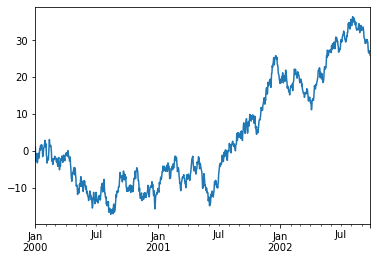

In [165]:
ts.plot()

In [166]:
ts

2000-01-01     1.007851
2000-01-02    -1.742173
2000-01-03    -2.843343
2000-01-04    -1.964742
2000-01-05    -0.752860
                ...    
2002-09-22    26.505133
2002-09-23    26.796913
2002-09-24    27.128878
2002-09-25    26.751254
2002-09-26    25.861046
Freq: D, Length: 1000, dtype: float64

In [167]:
#데이터프레임에서 plot() 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리합니다.
df = pd.DataFrame(np.random.randn(1000, 4), index = ts.index, columns=['A','B','C','D'])

In [168]:
df

,A,B,C,D
2000-01-01,0.162672,-0.889579,0.358036,1.675638
2000-01-02,0.372594,-0.748652,-2.201076,1.075777
2000-01-03,-2.376748,-0.518731,0.520609,0.316507
2000-01-04,1.208414,0.740013,-1.101284,1.232662
2000-01-05,2.798758,-0.586646,-0.133159,-0.631266
...,...,...,...,...
2002-09-22,0.731545,0.563956,0.611348,-0.160684
2002-09-23,-0.165185,-1.230164,0.000175,-0.115576
2002-09-24,-1.874272,-0.821844,-0.616882,1.211668
2002-09-25,-0.838731,0.384624,0.527305,2.187332


In [169]:
df = df.cumsum()

In [170]:
df

,A,B,C,D
2000-01-01,0.162672,-0.889579,0.358036,1.675638
2000-01-02,0.535266,-1.638231,-1.843040,2.751416
2000-01-03,-1.841482,-2.156962,-1.322431,3.067923
2000-01-04,-0.633068,-1.416949,-2.423715,4.300585
2000-01-05,2.165690,-2.003595,-2.556873,3.669319
...,...,...,...,...
2002-09-22,1.227749,-49.658972,29.621658,-2.286665
2002-09-23,1.062564,-50.889136,29.621833,-2.402241
2002-09-24,-0.811708,-51.710980,29.004951,-1.190573
2002-09-25,-1.650439,-51.326356,29.532256,0.996760


<Figure size 432x288 with 0 Axes>

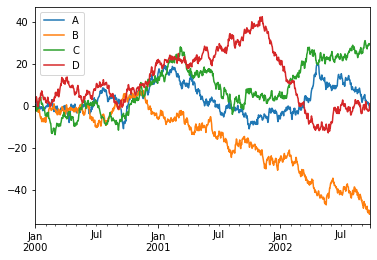

In [171]:
plt.figure()
df.plot()
plt.legend(loc='best')

# 12. Getting Data In / OUt (데이터 입/출력)

## CSV

In [172]:
#csv 파일에 습니다.
df.to_csv('foo.csv')

In [173]:
#csv 파일을 읽습니다.
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.162672,-0.889579,0.358036,1.675638
1,2000-01-02,0.535266,-1.638231,-1.843040,2.751416
2,2000-01-03,-1.841482,-2.156962,-1.322431,3.067923
3,2000-01-04,-0.633068,-1.416949,-2.423715,4.300585
4,2000-01-05,2.165690,-2.003595,-2.556873,3.669319
...,...,...,...,...,...
995,2002-09-22,1.227749,-49.658972,29.621658,-2.286665
996,2002-09-23,1.062564,-50.889136,29.621833,-2.402241
997,2002-09-24,-0.811708,-51.710980,29.004951,-1.190573
998,2002-09-25,-1.650439,-51.326356,29.532256,0.996760


## HDF5

HDFStores에 읽고 씁니다.


In [175]:
#HDF5 Store에 씁니다.
df.to_hdf('foo.h5', 'df')

In [176]:
#HDF5 Store에서 읽어옵니다.
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,0.162672,-0.889579,0.358036,1.675638
2000-01-02,0.535266,-1.638231,-1.843040,2.751416
2000-01-03,-1.841482,-2.156962,-1.322431,3.067923
2000-01-04,-0.633068,-1.416949,-2.423715,4.300585
2000-01-05,2.165690,-2.003595,-2.556873,3.669319
...,...,...,...,...
2002-09-22,1.227749,-49.658972,29.621658,-2.286665
2002-09-23,1.062564,-50.889136,29.621833,-2.402241
2002-09-24,-0.811708,-51.710980,29.004951,-1.190573
2002-09-25,-1.650439,-51.326356,29.532256,0.996760


## Excel
MS Excel에 일고 씁니다

In [177]:
#엑셀 파일에 씁니다.
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [178]:
#엑셀 파일을 읽어옵니다
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.162672,-0.889579,0.358036,1.675638
1,2000-01-02,0.535266,-1.638231,-1.843040,2.751416
2,2000-01-03,-1.841482,-2.156962,-1.322431,3.067923
3,2000-01-04,-0.633068,-1.416949,-2.423715,4.300585
4,2000-01-05,2.165690,-2.003595,-2.556873,3.669319
...,...,...,...,...,...
995,2002-09-22,1.227749,-49.658972,29.621658,-2.286665
996,2002-09-23,1.062564,-50.889136,29.621833,-2.402241
997,2002-09-24,-0.811708,-51.710980,29.004951,-1.190573
998,2002-09-25,-1.650439,-51.326356,29.532256,0.996760


# 13. Gotchas (잡았다!)

연산 수행 시 다음과 같은 예외 상황을 볼 수도 있습니다.

In [179]:
if pd.Series([False, True, False]):
    print('I was true')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [180]:
#이러한 경우에는 any(), all(), empty 등을 사용해서 무엇을 원하는지를 선택(반영)해주어야 합니다.
if pd.Series([False, True, False])is not None:
    print('I was not None')

I was not None
